In [1]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
np.random.seed(42)

In [5]:
X1 = X.to_numpy()
y1 = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = X1[:49000], X1[49000:], y1[:49000], y1[49000:]

Label: 6


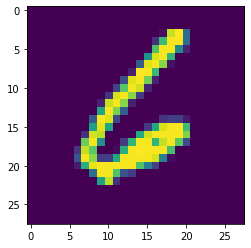

In [7]:
print(f'Label: {y_train[-1]}')
plt.imshow(X_train[-1].reshape(28, 28))

Q.2

In [8]:
print(X_train[y_train == '6'].shape, X_train[y_train == '9'].shape)
print(X_test[y_test == '6'].shape, X_test[y_test == '9'].shape)

(4855, 784) (4891, 784)
(2021, 784) (2067, 784)


In [9]:
X_train_69 = np.row_stack((X_train[y_train == '6'], X_train[y_train == '9']))
X_test_69 = np.row_stack((X_test[y_test == '6'], X_test[y_test == '9']))

In [10]:
y_train_69 = np.concatenate(([1] * 4855, [0] * 4891))
y_test_69 = np.concatenate(([1] * 2021, [0] * 2067))

In [11]:
print(X_train_69.shape, y_train_69.shape)
print(X_test_69.shape, y_test_69.shape)

(9746, 784) (9746,)
(4088, 784) (4088,)


In [12]:
np.random.seed(1729)

In [13]:
X_train_69, y_train_69 = shuffle(X_train_69, y_train_69, random_state=1729)
X_test_69, y_test_69 = shuffle(X_test_69, y_test_69, random_state=1729)

In [14]:
print(y_train_69.sum(), y_test_69.sum())

4855 2021


In [15]:
from sklearn.preprocessing import StandardScaler
x_train_69Tf = StandardScaler().fit_transform(X_train_69)

In [16]:
print(x_train_69Tf[0].mean(), x_train_69Tf[0].std())

0.08128379559427823 0.7358823226037738


In [17]:
print(x_train_69Tf[:, 0].mean(), x_train_69Tf[:, 0].std())

0.0 0.0


A

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

estimator = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, eta0=0.01, alpha=0, learning_rate='constant', random_state=10)
pipe_sgd = make_pipeline(estimator)
Loss = []
iterations = 30
for i in range(iterations):
  pipe_sgd.fit(X_train_69, y_train_69)
  y_pred = pipe_sgd.predict_proba(X_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

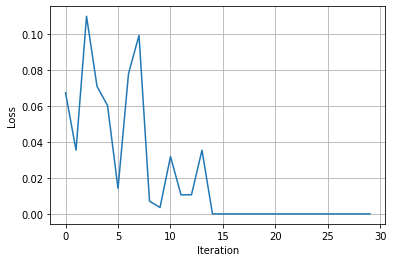

In [19]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

B

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

estimator = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, eta0=0.000001, alpha=0, learning_rate='constant', random_state=10)
pipe_sgd = make_pipeline(estimator)
Loss = []
iterations = 30
for i in range(iterations):
  pipe_sgd.fit(X_train_69, y_train_69)
  y_pred = pipe_sgd.predict_proba(X_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

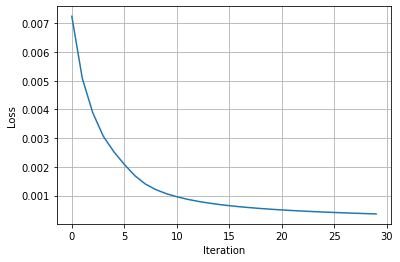

In [21]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

C

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

estimator = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, alpha=0, eta0=0.01, learning_rate='constant', random_state=10)
pipe_sgd = make_pipeline(StandardScaler(), estimator)
Loss = []
iterations = 30
for i in range(iterations):
  pipe_sgd.fit(X_train_69, y_train_69)
  y_pred = pipe_sgd.predict_proba(X_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

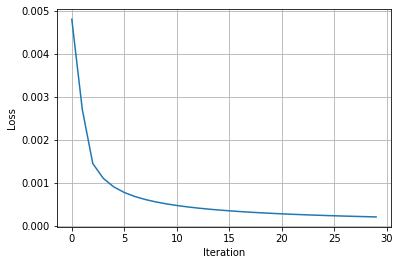

In [23]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

D

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline

estimator = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, alpha=0, power_t=1, eta0=0.01, learning_rate='invscaling', random_state=10)
pipe_sgd = make_pipeline(estimator)
Loss = []
iterations = 30
for i in range(iterations):
  pipe_sgd.fit(X_train_69, y_train_69)
  y_pred = pipe_sgd.predict_proba(X_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

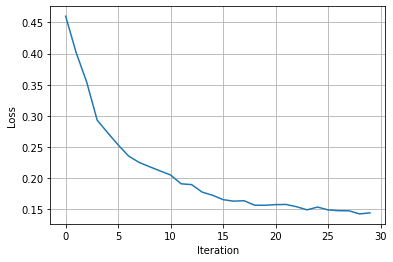

In [25]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Q.3

In [26]:
y_train

array(['5', '0', '4', ..., '8', '3', '6'], dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


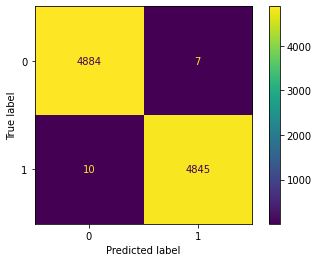

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

bin_sgd_clf = SGDClassifier(loss='log', penalty='l2', max_iter=10, warm_start=False, eta0=0.5, alpha=0, shuffle=True, learning_rate='invscaling', random_state=10)
bin_sgd_clf.fit(X_train_69, y_train_69)
y_hat_train_69 = bin_sgd_clf.predict(X_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69, y_hat_train_69)

9's predicted as 6's are the FPs, identify them.

In [28]:
y_train_69

array([1, 0, 1, ..., 1, 1, 1])

This is the method given in solution document

In [29]:
all_true_9 = np.where(y_train_69 == 0)

In [30]:
all_pred_6 = np.where(bin_sgd_clf.predict(X_train_69) == 1)

In [45]:
np.intersect1d(all_true_9, all_pred_6)

array([2167, 2407, 3036, 3368, 4217, 5556, 6230])

Another method https://discourse.onlinedegree.iitm.ac.in/t/week-6-graded-assignment-q4/53684/5

In [46]:
fps = np.logical_and(y_train_69 == 0, bin_sgd_clf.predict(X_train_69) == 1)

In [47]:
np.where(fps)  # doesn't need to write fps == True explicitly

(array([2167, 2407, 3036, 3368, 4217, 5556, 6230]),)

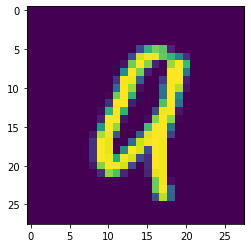

In [33]:
plt.imshow(X_train_69[fps][0].reshape(28, 28))  # display the first among them

Q.5

In [34]:
from sklearn.datasets import fetch_20newsgroups
ng = fetch_20newsgroups()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ng.data, ng.target, test_size=0.3, random_state=0)

In [36]:
len(ng.data), len(ng.target)

(11314, 11314)

In [37]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7919, 3395, 7919, 3395)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

TfidfVectorizer().fit_transform(ng.data).shape

(11314, 130107)

In [39]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9379972218714484